# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [1]:
import numpy as np
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

(2726, 28, 28, 3)


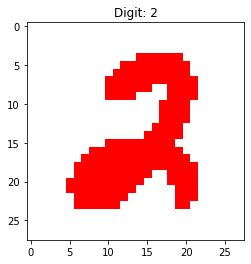

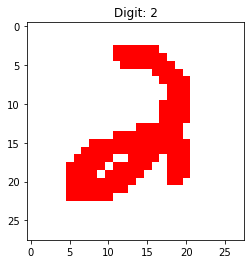

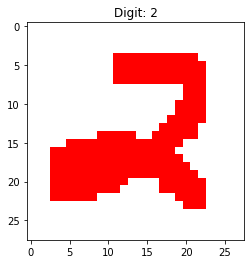

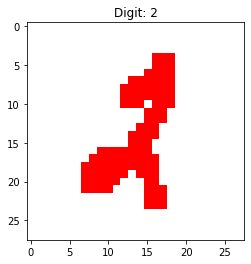

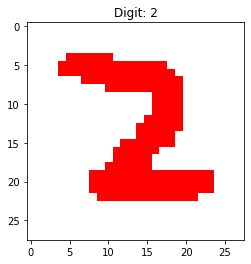

In [8]:
filename = "training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()
print(train_images.shape)
num_images = 5
for i in range(num_images):
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Digit: {train_digits[i]}")
    plt.show()

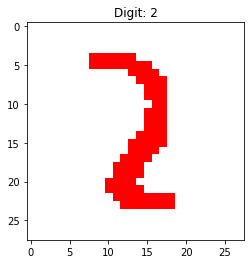

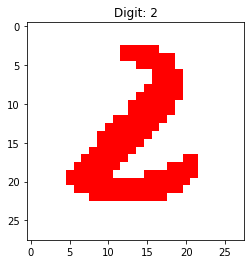

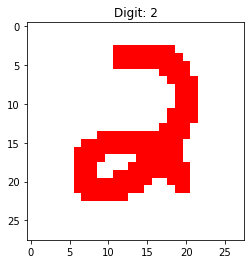

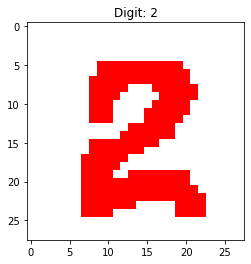

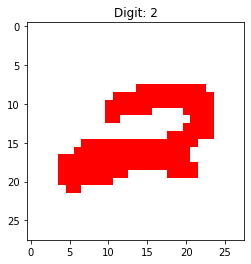

In [3]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')



test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])

num_images = 5
for i in range(num_images):
    plt.imshow(test_images_1[i], cmap='gray')
    plt.title(f"Digit: {test_digits_1[i]}")
    plt.show()

test1.close()

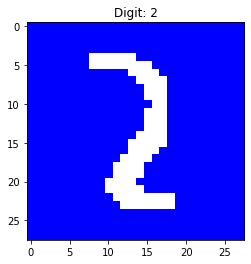

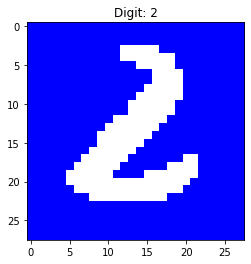

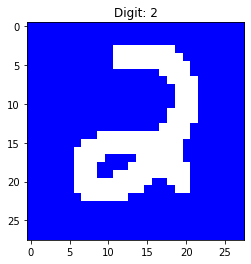

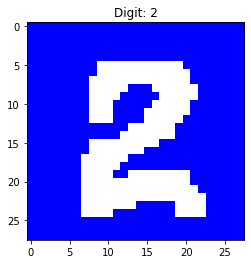

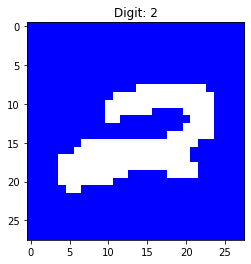

In [6]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

num_images = 5
for i in range(num_images):
    plt.imshow(test_images_2[i], cmap='gray')
    plt.title(f"Digit: {test_digits_2[i]}")
    plt.show()

In [7]:
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test1_images_flat = test_images_1.reshape((test_images_1.shape[0], -1))
test2_images_flat = test_images_2.reshape((test_images_2.shape[0], -1))

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,), max_iter=100, random_state=42)
mlp_classifier.fit(train_images_flat, train_digits)

predictions = mlp_classifier.predict(test1_images_flat)
accuracy = accuracy_score(test_digits_1, predictions)
print("Accuracy 1:", accuracy)

predictions = mlp_classifier.predict(test2_images_flat)
accuracy = accuracy_score(test_digits_2, predictions)
print("Accuracy 2:", accuracy)

Accuracy 1: 1.0
Accuracy 2: 0.0


Testing data 2 performs poorly on the model while testing data 1 has 100% accuracy. This is because the testing data 2 has a different format from what training data has.

Converting all images into gray scale

In [27]:
train_images_gray = np.dot(train_images[:, :, :, :3], [0.2989, 0.5870, 0.1140])
test_images_1_gray = np.dot(test_images_1[:, :, :, :3], [0.2989, 0.5870, 0.1140])
test_images_2_gray = np.dot(test_images_2[:, :, :, :3], [0.2989, 0.5870, 0.1140])

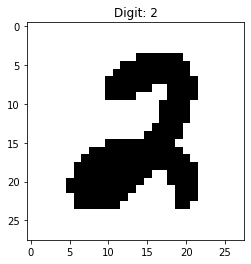

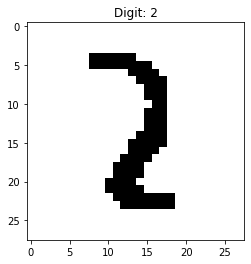

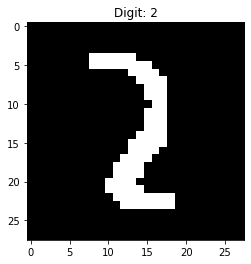

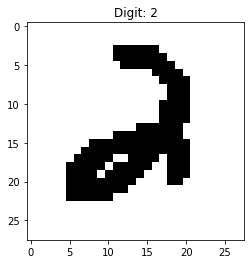

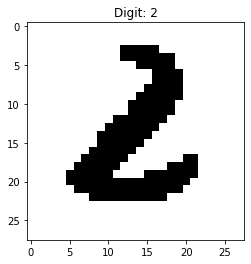

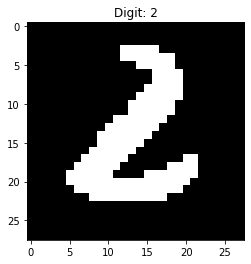

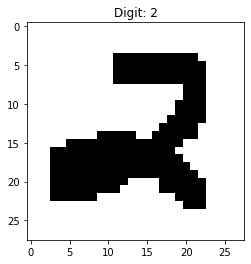

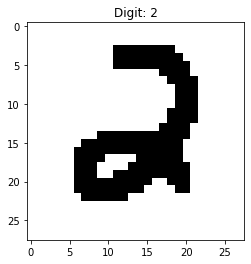

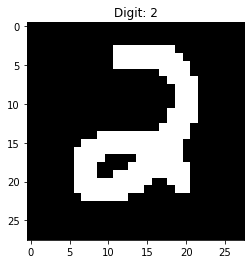

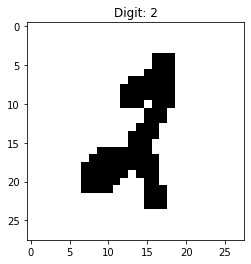

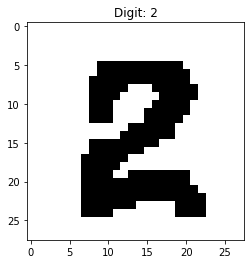

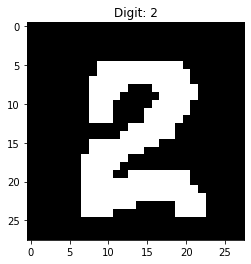

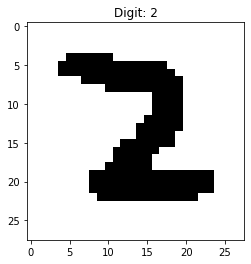

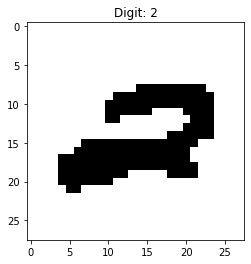

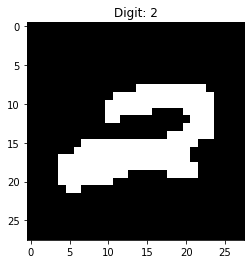

In [29]:
num_images = 5
for i in range(num_images):
    plt.imshow(train_images_gray[i], cmap='gray')
    plt.title(f"Digit: {train_digits[i]}")
    plt.show()
    plt.imshow(test_images_1_gray[i], cmap='gray')
    plt.title(f"Digit: {test_digits_1[i]}")
    plt.show()
    plt.imshow(test_images_2_gray[i], cmap='gray')
    plt.title(f"Digit: {test_digits_2[i]}")
    plt.show()

In [28]:
train_images_flat = train_images_gray.reshape((train_images_gray.shape[0], -1))
test1_images_flat = test_images_1_gray.reshape((test_images_1_gray.shape[0], -1))
test2_images_flat = test_images_2_gray.reshape((test_images_2_gray.shape[0], -1))

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,), max_iter=100, random_state=42)
mlp_classifier.fit(train_images_flat, train_digits)

predictions = mlp_classifier.predict(test1_images_flat)
accuracy = accuracy_score(test_digits_1, predictions)
print("Accuracy 1:", accuracy)

predictions = mlp_classifier.predict(test2_images_flat)
accuracy = accuracy_score(test_digits_2, predictions)
print("Accuracy 2:", accuracy)

Accuracy 1: 0.9933269780743565
Accuracy 2: 0.3606609469335875


/home/chirag/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for second test data has been improved after converting all images into gray scale.